In [ ]:
### Running in Google Colab? You'll want to uncomment and run these cell once each time you start this notebook.

"""
!git clone https://github.com/psheehan/CIERA-HS-Program.git
%cd CIERA-HS-Program/Projects/ExtractingEnergyFromBlackHoles
"""

# How can you extract energy from black holes?
### Project Lead: Nick Kaaz
### Black holes are the Universe's ultimate energy source, and we are going to see why.
Black holes eat their food (food, typically, being plasma) through 'accretion disks', and release energy in the form of radiation. Here, an artistic depiction of a black hole feeding off an accretion disk, and producing a jet:
<img src="BlackHole_Simonnet_960.jpg">
The nature of accretion disks has been mysterious for a long time, and before we could only infer their presence around black holes. Yet, recently we have actually observed the accretion disk around a massive black hole in a nearby galaxy, M87, for the first time with the Event Horizon Telescope: 
<img src="20190410-78m-800x466.png">
(This image will get sharper and higher resolution in the years to come!)

### Light can never escape from a black hole, yet black holes produce the brightest emission in the Universe. 
How can this statement, seemingly a contradiction, be true? The short answer is that while indeed, light can never escape a black hole, the regions immediately surrounding the black hole can be extremely bright. To compare, imagine dropping a rock off a tall building. The rock will move faster and faster as it falls, because it is gaining kinetic energy as its potential energy becomes increasingly negative. Accretion disks work much the same way, except the potential energy is lost as light, which we can then observe here at Earth.

### Exercise 1: How efficient is an accretion disk at converting matter into light?
 First, consider any type of energy source on Earth. It can be natural gas, coal power, solar energy, nuclear energy, whatever. In any context, you have fuel that you extract energy from. For any amount of material with some mass $m$, the energy fundamental to it is given by the familiar form,
#### $E_{\rm rest\,mass} = mc^2$
Here, $c$ is the speed of light. We will call this quantity, $E_{\rm rest\,mass}$, the 'rest-mass' energy. Whenever you use fuel as an energy source, you are really extracting rest-mass energy from it. Consider a nuclear reactor, which uses nuclear fission to harness the rest-mass energy of heavy elements such as uranium. For every gram of fuel that you put into the reactor, you extract about 0.08% of the rest-mass energy. Written otherwise, the efficiency of nuclear fission in our nuclear reactors is roughly $\epsilon_{\rm nuclear} = 0.0008$. This is a really small number; yet, this is still far greater than the efficiencies of other energy sources that we use on Earth. 

Next, lets imagine that black hole accretion disks are another type of energy source, and roughly determine what their efficiency should be. Consider a ball of plasma with mass $m_{\rm plasma}$ which is orbiting a black hole at some distance $r$ away. The ball of plasma then has an "orbital energy", defined as:
#### $E_{\rm orb} = \frac{-GM_\bullet m_{\rm plasma}}{2r}$. 
Here, $G$ is the gravitational constant and $M_\bullet$ is the mass of the black hole. The orbital energy will become increasingly negative as the ball of plasma gets closer to the black hole. But, energy is conserved - so as the orbital energy gets lower and lower towards the black hole, most of the energy is radiated as light. In consequence, as the ball of plasma makes its journey through the accretion disk and into the black hole, the energy released as light is (roughly) equal and opposite to the change in orbital energy,
#### $\Delta E_{\rm light} = -\left[E_{\rm orb}(r=r_{\rm inner}) - E_{\rm orb}(r=r_{\rm outer})\right]$
But, we assume that the outer edge of the accretion disk, $r_{\rm outer}$, is really big; this means that we can take $E_{\rm orb}(r=r_{\rm outer}) \approx 0$, meaning that 
#### $\Delta E_{\rm light} \approx -E_{\rm orb}(r=r_{\rm inner})$
So the energy emitted depends mainly on the inner edge of the accretion disk, $r_{\rm inner}$! But, we want the *efficiency* at which energy - in the form of light - is extracted from the plasma. Often, this is also called the 'radiative efficiency' and labeled $\eta$. To find this, we just divide $\Delta E_{\rm light}$ by the rest-mass energy of the plasma,
#### $\epsilon_{\rm disk} = \Delta E_{\rm light}/E_{\rm rest\,mass}$
In the following cell, using these equations, make a function that calculates $\epsilon_{\rm disk}$ as a function only of the radius of the inner edge of the accretion disk. For simplicity, assume $G=1$, $M_\bullet=1$, and $c=1$. If you call your function with a radius of $10.$, then it should return an efficiency of $0.05$.

In [68]:
def efficiency_disk(r_inner):
    G = 1
    M = 1
    m_plasma = 1
    c = 1
    
    dE_light = G*M*m_plasma / (2*r_inner)
    E_restmass = m_plasma * c**2
    
    return dE_light / E_restmass

print(efficiency_disk(10.))

0.05


Now that we have our efficiency function, lets try and plot it. First, we need an array of radii to use for the inner edge of an accretion disk. We can make this by using the 'linspace' function from the 'numpy' package. Run the following cell, and it will open up a dialogue explaining how to use linspace. 

In [3]:
# Import the numpy library, call it 'np'
import numpy as np
# Often, you can find out more about a function in jupyter notebooks by putting a ? at the end of it:
np.linspace?

Next, use np.linspace to make a radius array that is evenly spaced from 1 to 100, with 100 total intervals. 

In [9]:
r_inner = np.linspace(1.,100.,100)

Then, send your radius array to your efficiency function to calculate efficiency as a function of radius. Using both your arrays, plot efficiency versus radius. 

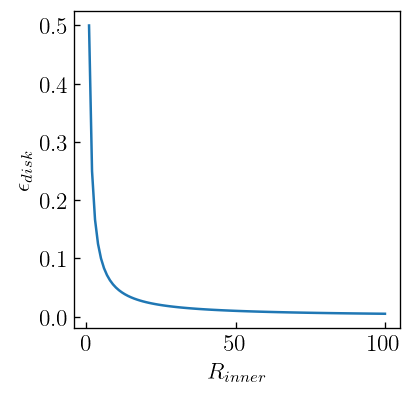

In [10]:
## First, import matplotlib.pyplot library as 'plt' so we can plot things
import matplotlib.pyplot as plt
%matplotlib inline

## Then calculate efficiency and plot it
e_disk = efficiency_disk(r_inner)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3.5,3.5), dpi=120)

ax.plot(r_inner, e_disk)

ax.set_xlabel("$R_{inner}$", fontsize=14)
ax.set_ylabel("$\epsilon_{disk}$", fontsize=14)

ax.tick_params("both", labelsize=14)

Great! As you may notice, the smaller the radius (corresponding to the inner edge of the accretion disk), the greater the efficiency. But, where is the true inner edge of the accretion disk? Well, there is something called the 'innermost stable circular orbit' (ISCO), that exists at a certain radius. Beyond this radius, mass can slowly spiral into the black hole (like in the accretion disk), but within this radius, mass is forced to plunge into the black hole - and the accretion disk collapses. The radius of the ISCO is,
#### $r_{\rm ISCO} = \frac{6GM_\bullet}{c^2}$
As it turns out, this radius will actually change if the black hole *rotates*, but we wont worry about that here. For now, use your efficiency function to calculate the efficiency at the ISCO (again, making the simplifying assumptions that $G=1$, $M_\bullet=1$, and $c=1$). 

In [72]:
G = 1
M = 1
c = 1

r_ISCO = 6*G*M/c**2

efficiency_ISCO = efficiency_disk(r_ISCO)

print("R_ISCO = ", r_ISCO)
print("efficiency_ISCO = ", efficiency_ISCO)

R_ISCO =  6.0
efficiency_ISCO =  0.08333333333333333


Compare this efficiency to that of nuclear fission reactors, $\epsilon_{\rm nuc}$, given earlier. How much more efficient are black hole accretion disks than our nuclear reactors here on Earth?

In [16]:
efficiency_nuc = 0.0008

efficiency_ratio = efficiency_ISCO/efficiency_nuc

print("eff_ISCO / eff_nuc = ", efficiency_ratio)

eff_ISCO / eff_nuc =  104.16666666666666


### Exercise 2: Using simulations to measure the radiative efficiency
In the previous exercise, what we have done is used some simple mathematical arguments to predict how bright accretion disks can shine. But, how do we test this? Often, ideas are tested by pointing telescopes at the sky and measuring what you see. But, there is another approach: you build a laboratory inside your computer - this is what a simulation is. 

How simulations are built depend on what physics you want to study. For us, we model how plasmas and magnetic fields evolve in the curved spacetime that surrounds a black hole. We do this by creating a spherical grid, which looks something like this:
<img src='polar_grid.png'>
We call the size of this grid our 'computational domain'. It's defined by some outer boundary and some inner boundary. In our case, we usually take the inner boundary to be the event horizon of the black hole and the outer boundary to be much larger than the accretion disk we want to simulate. Then, we define some 'initial conditions'; at each location on the grid, we input a value of gas density, velocity, etc to start us off. We then press play, and see what happens!

Now, lets try to analyze data from some simulations. As in last exercise, moving forward, assume that $G=1$, $M_\bullet=1$, and $c=1$ (this is the special unit system used by the simulation). First, we need to load a Python script that is used to interpret data from the simulation; this is named 'harm_script.py'. 

In [1]:
%run -i harm_script.py

We now have several functions available to us that were defined in harm_script.py to analyze our simulation data. But, we still need to load our simulation data - so lets do that now. Inside the ./simulations folder, there are two directories for two different simulations, 'zero_spin', and 'high_spin'. Lets now change our directory to the 'zero_spin'  simulation. 

In [2]:
%cd ./simulations/zero_spin

/Users/psheehan/Documents/Programs/CIERA-HS-Program/Projects/BlackHoleEnergy/simulations/zero_spin


Now we have access to the data from the 'zero_spin' simulation. There are two types of files, 'gdump', and 'dump###'. 'gdumps' has information about the grid, like how the grid is oriented in the above image. 'dump###' has what the simulation looks like at different times. So, 'dump000' is the beginning of the simulation, before anything has happened; 'dump001' is a little while later, 'dump002' is after that, etc. 
Lets use two functions from the script we ran, 'harm_script.py', to load the grid information and the initial conditions of our simulation

In [24]:
# rg is short for 'read gdumps', and will read our grid information from 'gdumps' for us:
rg('gdump')
# rd is short for 'read dumps', and will read simulation information from one of our 'dumps###' files for us:
rd('dump000')

We've now loaded several quantities from our simulation, which have values at each location in our grid. The quantity 'rho', for instance, is a three-dimensional array that has information about the gas density. Lets check how big this array is by checking its "shape":

In [20]:
rho.shape

(128, 128, 1)

You should see that rho has a shape (128, 128, 1). Because there are three quantities, this array has three dimensions. The number correspond to the number of grid cells in each direction. The higher the number of grid cells, the higher the resolution of the simulation. The first number corresponds to the 'radial' ($r$) direction, which tells you how close or far away from the black hole you are. The second number corresponds to the 'theta' ($\theta$) direction, which is an angle that tells you how far you are from the equator of the accretion disk. The third number corresponds to the 'phi' ($\phi$) direction, which tells you your position in the accretion disk. See the following diagram for reference:

<img src='spherical_coordinates.jpg'>

You'll notice that in the $r$ or $\theta$ directions, the numbers are both 128, meaning we have 128 grid cells in each of these directions. But, in the $\phi$ direction, we only have 1 grid cell. This means we are approximating the disk as 'axisymmetric', meaning that the properties of the disk don't change as you change your position in $\phi$. 

Next, we're going to try to make a plot of the initial gas density of the disk. Our goal is going to make it look something like this: 
<img src="example_harmpi_initial_condition.png">
In this plot, and in the plots we will make, we are looking at the accretion disk from the edge on. Here, the white circle in the middle marks the edge of the event horizon, and the color indicates how dense the gas is. The axes are in units of "$r_{\rm g}$", which is called the 'gravitational radius', and in our special unit system $r_{\rm g} = 1$. 

We want to measure the gas density as a function of position $x$ and $z$, but the code is spherical, so the quantities that we have loaded are radius (stored in the array "r"), theta (stored in the array "h") and phi (stored in the array "ph"). Moving forward, we wont worry about the "ph" array, because the simulation is axisymmetric. We can convert from our spherical coordinates $r$,$\theta$,$\phi$ to cartesian $x$,$y$,$z$ by using the following equations,
#### $x = r{\rm sin}(\theta)$
#### $z = r{\rm cos}(\theta)$

Here we are worrying only about the $x$ and $z$ directions here, because we are taking $\phi=0$. Use the arrays 'r' and 'h' to calculate new arrays for the x and z coordinates. (You can do this using the numpy functions np.cos() and np.sin() ). 

In [25]:
x = r * np.sin(h)
y = r * np.cos(h)

Great. Soon, we can plot the initial gas density of our accretion disk. We will do this using the matplotlib function 'plt.contourf', which makes filled contours of different variables as a function of position. We will use this to plot density ('rho') as a function of $x$ and $z$. But, currently our arrays are all three-dimensional, but we want to plot in two-dimensions. We can do this by eliminating the $\phi$ direction, letting us look at the disk from the side on. For any of our arrays, we can do this by taking the zero-th element in the $\phi$ direction, and leaving the $r$ and $\theta$ directions as is (i.e., twoD_array = threeD_array[:,:,0]). 

Try first making two dimensional versions of the arrays for 'rho' and the 'x' and 'z' arrays that you made previously. Then, check the shape of the new twoD_array, and verify that the shape is (128, 128). 

In [26]:
x = x[:,:,0]
y = y[:,:,0]
rho = rho[:,:,0]

print(x.shape, y.shape, rho.shape)

(128, 128) (128, 128) (128, 128)


Now, use plt.contourf to make a plot of density as a function of x and z. plt.contourf accepts three arguments, like so: plt.contourf( horizontal_axis, vertical_axis, variable )

As before, you can always check the documentation of this function by typing 'plt.contourf?'

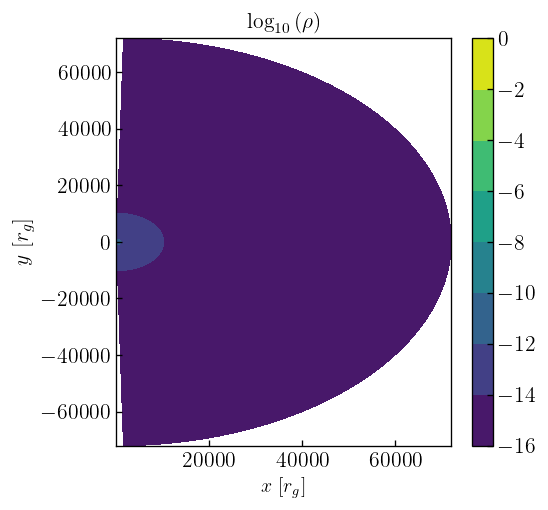

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4.5,4.5), dpi=120)

im = ax.contourf(x, y, np.log10(rho))

ax.set_xlabel("$x$ [$r_g$]", fontsize=12)
ax.set_ylabel("$y$ [$r_g$]", fontsize=13)

ax.set_title(r"$\log_{10} \, (\rho)$", fontsize=13)

ax.tick_params("both", labelsize=13)

cb = fig.colorbar(im)
cb.ax.tick_params("both", labelsize=13)

As you might notice, even if the plot showed up, it looks really zoomed out and you can't see anything. That's because we need to make some modifications to our plot. In the following cell is half-written code, where you will replace the question marks with numbers to make three changes:
1. Change the x limits and y limits until you see the accretion disk. 
2. Instead of plotting density, plot the *logarithm* of density (you can do this using the np.log10() function). This is useful because we have a really big range of values for densities. In logspace, ${\rm  log}_{10}(0) = 1$, ${\rm log}_{10}(10) = 1$, ${\rm log}_{10}(0.1) = -1$, etc. 
3. We need to tell the code the range of density values to plot. We will do this by defining "my_levels", which should very from some minimum value to some maximum value.  

It may be helpful to use the reference plot above to choose your different limits. Also, note that if you try to plot something that is out of the bounds of your 'my_levels' variable, it will just show up as white - this means you need to change your bounds.

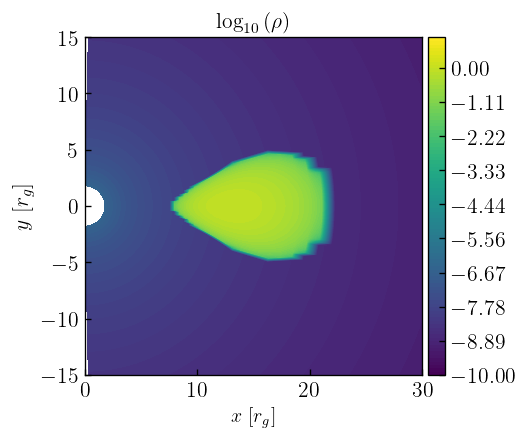

In [49]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4.5,4.5), dpi=120)

# my_levels sets the range of colors that are depicted in plt.contourf()
my_levels = np.linspace(-10., 1., 100)
im = ax.contourf(x, y, np.log10(rho), levels=my_levels)

ax.set_xlabel("$x$ [$r_g$]", fontsize=12)
ax.set_ylabel("$y$ [$r_g$]", fontsize=13)

ax.set_title(r"$\log_{10} \, (\rho)$", fontsize=13)

ax.tick_params("both", labelsize=13)

# xlim sets the range of the horizontal axis. The minimum value should be 0 in our case. 
ax.set_xlim(0, 30)
# ylim sets the range of the vertical axis
ax.set_ylim(-15 , 15)

# colorbar() makes the colorbar show up. 
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cb = fig.colorbar(im, cax=cax)
cb.ax.tick_params("both", labelsize=13)

# The following two lines force the aspect ratio of the plot to be unity, so the image isn't distorted. 
ax.set_aspect('equal', 'box')

fig.tight_layout()

Great - you should now have made a plot that looks similar to the reference plot above. But, this is just a snapshot at the beginning of the simulation, before anything has happened. Lets fast forward, and read in a new file. Use the rd() function, as a done before, to now read in the file 'dump200'. Then, copy what you did in the previous cells to make a new plot of the accretion disk.  

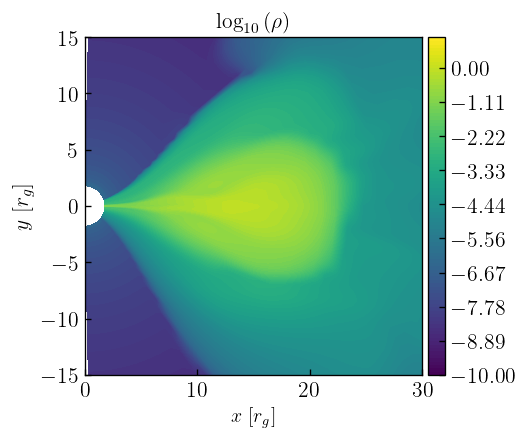

In [52]:
rd('dump200')

x = r * np.sin(h)
y = r * np.cos(h)

x = x[:,:,0]
y = y[:,:,0]
rho = rho[:,:,0]

from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4.5,4.5), dpi=120)

# my_levels sets the range of colors that are depicted in plt.contourf()
my_levels = np.linspace(-10., 1., 100)
im = ax.contourf(x, y, np.log10(rho), levels=my_levels)

ax.set_xlabel("$x$ [$r_g$]", fontsize=12)
ax.set_ylabel("$y$ [$r_g$]", fontsize=13)

ax.set_title(r"$\log_{10} \, (\rho)$", fontsize=13)

ax.tick_params("both", labelsize=13)

# xlim sets the range of the horizontal axis. The minimum value should be 0 in our case. 
ax.set_xlim(0, 30)
# ylim sets the range of the vertical axis
ax.set_ylim(-15 , 15)

# colorbar() makes the colorbar show up. 
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cb = fig.colorbar(im, cax=cax)
cb.ax.tick_params("both", labelsize=13)

# The following two lines force the aspect ratio of the plot to be unity, so the image isn't distorted. 
ax.set_aspect('equal', 'box')

fig.tight_layout()

What is different about this plot when compared to your previous plot of the initial conditions? Is the black hole accreting?

__Answer__: Yes!!!

For fun, try repeating the same exercise, but instead of the gas density 'rho', lets try some other quantities. You can try plotting 'pg', which corresponds to the gas pressure, or 'bsq', which corresponds to the magnetic pressure. You can change my_levels, xlim or ylim, or trying use regular or logarithmed units to see how the plots change. 

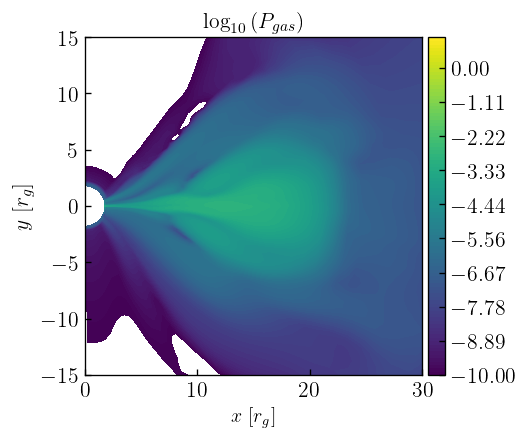

In [58]:
rd('dump200')

x = r * np.sin(h)
y = r * np.cos(h)

x = x[:,:,0]
y = y[:,:,0]
data = pg[:,:,0]

from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4.5,4.5), dpi=120)

# my_levels sets the range of colors that are depicted in plt.contourf()
my_levels = np.linspace(-10., 1., 100)
im = ax.contourf(x, y, np.log10(data), levels=my_levels)

ax.set_xlabel("$x$ [$r_g$]", fontsize=12)
ax.set_ylabel("$y$ [$r_g$]", fontsize=13)

ax.set_title(r"$\log_{10} \, (P_{gas})$", fontsize=13)

ax.tick_params("both", labelsize=13)

# xlim sets the range of the horizontal axis. The minimum value should be 0 in our case. 
ax.set_xlim(0, 30)
# ylim sets the range of the vertical axis
ax.set_ylim(-15 , 15)

# colorbar() makes the colorbar show up. 
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cb = fig.colorbar(im, cax=cax)
cb.ax.tick_params("both", labelsize=13)

# The following two lines force the aspect ratio of the plot to be unity, so the image isn't distorted. 
ax.set_aspect('equal', 'box')

fig.tight_layout()

Finally, we can start measuring the radiative efficiency of our simulation, and compare it to the prediction we made in Exercise 1. Our goal here will be to make a plot of radiative efficiency $\epsilon$ as a function of radius, similarly to what we we did in exercise 1, but now we want to compare our prediction to the radiative efficiency that we can compare directly from our simulation.  

We can recall from exercise 1 that the efficiency is calculated as,
#### $\epsilon = -E_{\rm orb}/E_{rest\,mass}$
In the simulation, $\epsilon$ is given by the quantity: "efficiency = 1 + ud[0]" Here, 'ud' is the 'four-velocity' of the plasma, which is a concept in relativity. The reason for why this quantity is the orbital energy is above the level of this project, but if you are interested in learning more, please let me know!

In the following cell, calculate the simulated radiative efficiency. If you take the shape of the efficiency you defined, you should find that it's a three-dimensional array, the same as we saw before for 'rho', with shape (128, 128, 1). 

In [60]:
efficiency = 1 + ud[0]
print(efficiency.shape)

(128, 128, 1)


Because we want to plot the radiative efficiency as a function of radius in the disk, we need to turn our efficiency into a one-dimensional array. Recall what we did for plt.contourf, where we turned our gas density into a two dimensional array. We want to do something similar for the efficiency, but we want to fix our polar angle $\theta$ such that we only look at values of $\theta$ that correspond to the disk mid-plane. The way our arrays are set up, this is half-way through the $\theta$ index, which is the second index of our array (i.e., our arrays is organized as array[radius, theta, phi]).

Create a one-dimensional array of radiative efficiencies in the disk and plot it as a function of radius. I would recommend setting the the limits of the x-axis to be between 0 and 10-100, and the limits of the y-axis to be between 0 and 0.1  

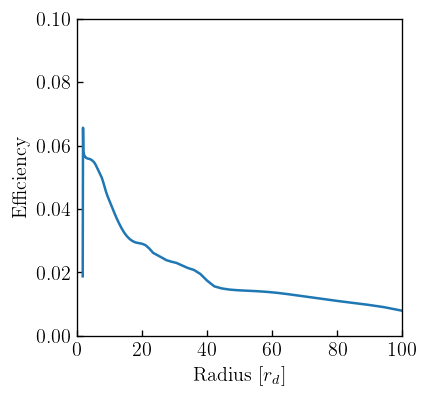

In [66]:
midplane = int(r.shape[1]/2)
r1d = r[:,midplane,0]
efficiency1d = efficiency[:,midplane,0]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3.5,3.5), dpi=120)

ax.plot(r1d, efficiency1d, "-")

ax.set_xlabel("Radius [$r_d$]", fontsize=12)
ax.set_ylabel("Efficiency", fontsize=12)

ax.set_xlim(0,100)
ax.set_ylim(0,0.1)

ax.tick_params("both", labelsize=12)

You should see that the simulated radiative efficiency increases as matter falls closer to the black hole. At small radii, the curve should flatten out; when this happens, you have reached the inner edge of your accretion disk. Lets compare this to our prediction we made in exercise 1. In the next cell, plot both your function for radiative efficiency that you made in exercise 1 together with the simulated radiative efficiency.

<IPython.core.display.Javascript object>


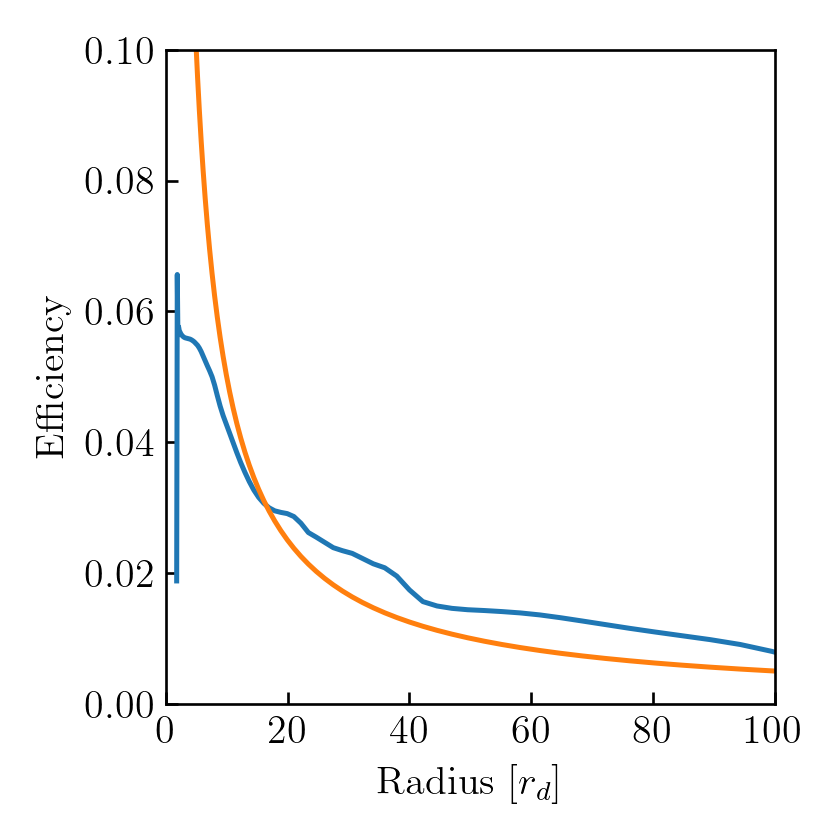

In [76]:
%matplotlib notebook

midplane = int(r.shape[1]/2)
r1d = r[:,midplane,0]
efficiency1d = efficiency[:,midplane,0]

theoretical_efficiency = efficiency_disk(r1d)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3.5,3.5), dpi=120)

ax.plot(r1d, efficiency1d, "-")
ax.plot(r1d, theoretical_efficiency, "-")

ax.set_xlabel("Radius [$r_d$]", fontsize=12)
ax.set_ylabel("Efficiency", fontsize=12)

ax.set_xlim(0,100)
ax.set_ylim(0,0.1)

ax.tick_params("both", labelsize=12)

fig.tight_layout()

What is the difference between these two curves? At about what radius is the inner edge of the accretion disk, based on the shape of the curve? Does this make sense?

__Answer:__ Inner edge is at radius ~4, similar to R_ISCO ~6

The true radiative efficiency of the accretion disk is what we measure it to be at the inner edge of the accretion disk. By eye from your plot, what is the value of this efficiency? Is this what you expected? How close does this match our prediction?

In [75]:
index_rinner = np.argmin(np.abs(r1d - 4))
print(r1d[index_rinner])

print("Theoretical efficiency:", efficiency_ISCO)
print("Actual efficiency:", efficiency1d[index_rinner])

3.9933891
Theoretical efficiency: 0.08333333333333333
Actual efficiency: 0.055755436


Hopefully, you are now convinced that accretion disks are excellent engines from which we can extract energy, in the form of light, from matter. In the next exercise, we will find that there is an even more lucrative energy source than the rest-mass of the infalling plasma - we can extract energy from the black hole itself. 

### Exercise 3: Extracting energy from black holes with jets
As plasma falls into a black hole through an accretion disk, it drags magnetic fields down with it. Magnetic fields can't fall into the black hole, so as more and more material is accreted, the magnetic field surrounding the black hole becomes increasingly strong. You can picture these magnetic field lines as strings that thread the accretion disk, something like this: 
<img src="black_hole_bfield_parabolic.png">
We usually think of black holes in terms of their mass. But, they actually rotate, too. Black holes are so dense that as they rotate, they literally drag the spacetime that surrounds them, forcing everything that exists around them to rotate as well. This causes the magnetic fields, dragged in by the accretion disk, to wind themselves up, until they form a tight coil along the poles of the black hole. Here, you can see a three-dimensional example of this in a simulation, where the coiled magnetic field linse are seen escaping through the poles:
<img src="jet_simulation.jpg">
These jets can propagate to extremely large distances. If they are harbored by supermassive black holes, which lurk at the centers of galaxies, these jets can even escape their host galaxy. This is an observation of such a jet, taken by the 'Very Large Array' radio telescope in New Mexico:
<img src="t15_3c175_vla_rot.jpg">
You can think of these jets as nature's particle accelerators. If you throw an electron into the jet, it will be launched along the coiled magnetic field lines that form the jet, reaching velocities that are nearly as high as the speed of light. While the magnetic field lines accelerate these particles, they can only do so because the rotating black hole twisted up the magnetic field in the first place. So, the energy that goes into these jets is partially supplied by the black hole. This means that accretion disks don't just extract rest-mass energy from the fuel they supply, they can steal energy from the black hole, making them even better energy sources!

In the last exercise, we looked at an accretion disk with a weak magnetic field, that was being consumed by a non-rotating black hole. Lets now try to visualize a different simulation, where the black hole is rapidly rotating and the magnetic fields are much stronger. Run the following line to change directory to the location of this new simulation. 

In [77]:
%cd ../high_spin

/Users/psheehan/Documents/Programs/CIERA-HS-Program/Projects/BlackHoleEnergy/simulations/high_spin


Now, we need to read the grid data (using the rg() command) and the simulation data (using the rd() command). In the following line, use rg() to load "gdump" and rd() to load "dump200".

In [78]:
rg("gdump")
rd("dump200")

Lets try visualizing the logarithm of the gas density for this simulation. In the following cell, use the same plt.contourf() code you used in the previous exercise to do this. You may want play around with the axes limits (given by plt.xlim and plt.ylim) and the color limits (given by levels) to make the simulation look the way you want. The accretion disk in this simulation should be much larger than in the previous simulation. 

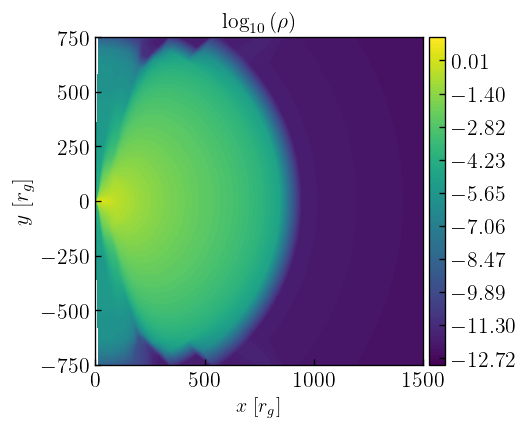

In [86]:
%matplotlib inline

rd('dump200')

x = r * np.sin(h)
y = r * np.cos(h)

x = x[:,:,0]
y = y[:,:,0]
rho = rho[:,:,0]

from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4.5,4.5), dpi=120)

# my_levels sets the range of colors that are depicted in plt.contourf()
my_levels = np.linspace(-13., 1., 100)
im = ax.contourf(x, y, np.log10(rho), levels=my_levels)

ax.set_xlabel("$x$ [$r_g$]", fontsize=12)
ax.set_ylabel("$y$ [$r_g$]", fontsize=13)

ax.set_title(r"$\log_{10} \, (\rho)$", fontsize=13)

ax.tick_params("both", labelsize=13)

# xlim sets the range of the horizontal axis. The minimum value should be 0 in our case. 
ax.set_xlim(0, 1500)
# ylim sets the range of the vertical axis
ax.set_ylim(-750 , 750)

# colorbar() makes the colorbar show up. 
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cb = fig.colorbar(im, cax=cax)
cb.ax.tick_params("both", labelsize=13)

# The following two lines force the aspect ratio of the plot to be unity, so the image isn't distorted. 
ax.set_aspect('equal', 'box')

fig.tight_layout()

Great. As is, this doesn't look drastically different than our previous simulation. But, that's because we are just visualizing the gas density, and jets are a magnetic phenomenon. So, we need to also visualize the magnetic field lines. Run the following line, which will read the simulation data about the magnetic fields, and measure how they change in the $r$ and $\theta$ directions.

In [85]:
magnetic_flux = 2.*np.pi*psicalc()
## magnetic_flux should already be a two-dimensional array
magnetic_flux.shape

(128, 128)

Now, lets plot our magnetic field lines on top of our gas density. Use the same code from when you plotted the gas density, but add a new line, running the function 'plt.contour' to plot the contours of 'magnetic_flux' on top of the gas density. Use the 'levels' argument to plot field_lines from 0 to the maximum value of magnetic_flux (which you can calculate using np.max() ). I recommend adding another argument to the plt.contour function call to set: colors='black'. Try changing different parameters in the plot until you are satisfied with how visible the magnetic field lines are. 

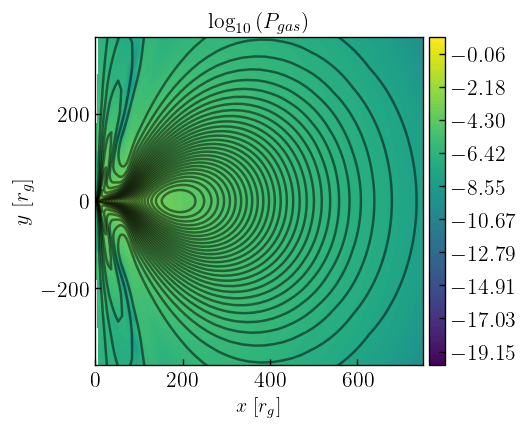

In [96]:
rd('dump200')

x = r * np.sin(h)
y = r * np.cos(h)

x = x[:,:,0]
y = y[:,:,0]
data = pg[:,:,0]

from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4.5,4.5), dpi=120)

# my_levels sets the range of colors that are depicted in plt.contourf()
my_levels = np.linspace(-20., 1., 100)
im = ax.contourf(x, y, np.log10(data), levels=my_levels)

mag_levels = np.linspace(0, magnetic_flux.max(), 30)
ax.contour(x, y, magnetic_flux, levels=mag_levels, colors="black", alpha=0.5)

ax.set_xlabel("$x$ [$r_g$]", fontsize=12)
ax.set_ylabel("$y$ [$r_g$]", fontsize=13)

ax.set_title(r"$\log_{10} \, (P_{gas})$", fontsize=13)

ax.tick_params("both", labelsize=13)

# xlim sets the range of the horizontal axis. The minimum value should be 0 in our case. 
ax.set_xlim(0, 750)
# ylim sets the range of the vertical axis
ax.set_ylim(-375 , 375)

# colorbar() makes the colorbar show up. 
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cb = fig.colorbar(im, cax=cax)
cb.ax.tick_params("both", labelsize=13)

# The following two lines force the aspect ratio of the plot to be unity, so the image isn't distorted. 
ax.set_aspect('equal', 'box')

fig.tight_layout()

Describe what you see. Is there a jet?

In [97]:
### Jet! Jet! Jet!

Lets try making one more plot that will really make the jet apparent, if it wasn't already. Instead of plotting the logarithm of rho, plot the logarithm of the quantity 'bsq/rho'. This compares the ratio of magnetic energy to gas density in the simulation. In regions where the jet exists, this should be greater than 1, because there is very little gas inside the jet. In the accretion disk, there is a lot of mass, so this quantity should be less than 1 in the disk. 

<ipython-input-103-d2cb151df909>:16: RuntimeWarning: divide by zero encountered in log10
  im = ax.contourf(x, y, np.log10(data), levels=my_levels)


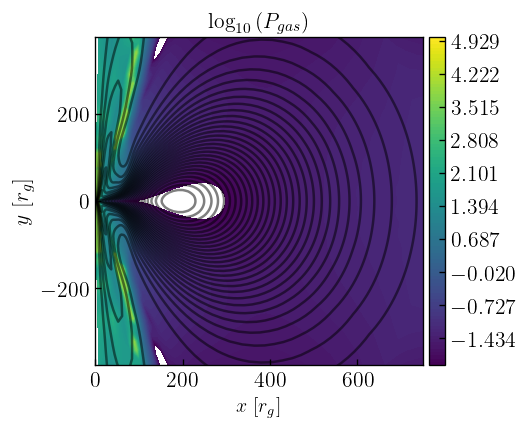

In [103]:
rd('dump200')

x = r * np.sin(h)
y = r * np.cos(h)

x = x[:,:,0]
y = y[:,:,0]
data = bsq[:,:,0]/pg[:,:,0]

from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4.5,4.5), dpi=120)

# my_levels sets the range of colors that are depicted in plt.contourf()
my_levels = np.linspace(-2., 5., 100)
im = ax.contourf(x, y, np.log10(data), levels=my_levels)

mag_levels = np.linspace(0, magnetic_flux.max(), 30)
ax.contour(x, y, magnetic_flux, levels=mag_levels, colors="black", alpha=0.5)

ax.set_xlabel("$x$ [$r_g$]", fontsize=12)
ax.set_ylabel("$y$ [$r_g$]", fontsize=13)

ax.set_title(r"$\log_{10} \, (P_{gas})$", fontsize=13)

ax.tick_params("both", labelsize=13)

# xlim sets the range of the horizontal axis. The minimum value should be 0 in our case. 
ax.set_xlim(0, 750)
# ylim sets the range of the vertical axis
ax.set_ylim(-375 , 375)

# colorbar() makes the colorbar show up. 
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cb = fig.colorbar(im, cax=cax)
cb.ax.tick_params("both", labelsize=13)

# The following two lines force the aspect ratio of the plot to be unity, so the image isn't distorted. 
ax.set_aspect('equal', 'box')

fig.tight_layout()

Now, we're going to try thinking about the efficiency of energy extraction when an accretion disk can cause a jet to form. To start, we are going to use the following formula:
### $P_{\rm jet} = \frac{c^5}{96\pi^2G^2M_\bullet^2}\Phi_{\rm BH}^2a^2$
This is the equation for the predicted jet *power*, which is how much energy per unit time that the jet extracts from the black hole and the magnetic field. There are two parameters that we are worrying about here, '$\Phi_{\rm BH}$' and '$a$'. $\Phi_{\rm BH}$ refers to the 'magnetic flux' surrounding the black hole, and is basically a measure of how much energy is in the magnetic fields. Conveniently, we already calculated this in the 'magnetic_flux' variable a couple cells ago. $a$ is called the 'dimensionless black hole spin', and is a measure of how fast the black hole is rotating. It has possible values from $-1 < a < 1$, where at $\pm1$ the black hole is 'maximally rotating', and the sign determines the direction with which the black hole rotates. 

If we want to measure the *efficiency* of energy extraction, we need something to compare this jet power to. To do so, we again look to the rest-mass energy supplied by the accretion disk. The amount of rest-mass energy per unit time supplied by the accretion disk is as follows,
### $\dot{E}_{\rm rest\,mass} = \dot{M}c^2$
Where $\dot{M}$ is the rate at which the black hole feeds from the disk. If we take the ratio of the jet power to the rest-mass energy supply rate, we get the efficiency of jet energy extraction:
### $\epsilon_{\rm jet} = \frac{P_{\rm jet}}{\dot{E}_{\rm rest\,mass}}$
We can test the predictions of these equation from our simulation. We will do this by first measuring the energy emitted by the jet directly, and then by measuring $\Phi_{\rm BH}$ and $\dot{M}$ to see if our equations give us the same result. Run the following cell, which will compute values of jet power and accretion rate as a function of radius.

In [104]:
# Calculate Pjet, the total energy / unit time leaving through the jet, at each radius:
aux()
dPjet = -gdet*Tud[1,0]*_dx2*_dx3
dPjet[bsq/rho<10.]*=0.
Pjet = dPjet.sum(2).sum(1)

# Calculate Mdot, the total mass / unit time falling through the accretion disk, at each radius:
dMdot = gdet*uu[1]*rho*_dx2*_dx3
Mdot  = dMdot.sum(2).sum(1)

# Pjet and Mdot should be one-dimensional arrays:
Pjet.shape
Mdot.shape

/Users/psheehan/Documents/Programs/CIERA-HS-Program/Projects/BlackHoleEnergy/harm_script.py:965: RuntimeWarning: invalid value encountered in true_divide
  omegaf1=fFdd(0,1)/fFdd(1,3)
/Users/psheehan/Documents/Programs/CIERA-HS-Program/Projects/BlackHoleEnergy/harm_script.py:966: RuntimeWarning: invalid value encountered in true_divide
  omegaf2=fFdd(0,2)/fFdd(2,3)


(128,)

Both quantities 'Pjet' (the jet power) and 'Mdot' (the accretion rate) are functions of radius. In the next two cells, try plotting Pjet and Mdot as functions of radius

(0.0, 500.0)

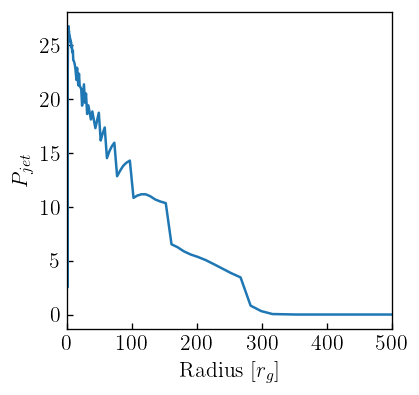

In [109]:
midplane = int(r.shape[1]/2)
r1d = r[:,midplane,0]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3.5,3.5), dpi=120)

ax.plot(r1d, Pjet, "-")

ax.set_xlabel("Radius [$r_g$]", fontsize=13)
ax.set_ylabel("$P_{jet}$", fontsize=13)

ax.tick_params("both", labelsize=13)

ax.set_xlim(0,500)

(0.0, 500.0)

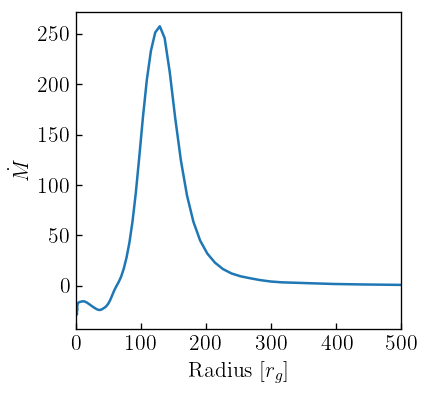

In [110]:
midplane = int(r.shape[1]/2)
r1d = r[:,midplane,0]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3.5,3.5), dpi=120)

ax.plot(r1d, Mdot, "-")

ax.set_xlabel("Radius [$r_g$]", fontsize=13)
ax.set_ylabel("$\dot{M}$", fontsize=13)

ax.tick_params("both", labelsize=13)

ax.set_xlim(0,500)

You should see peaks in both distributions, at radii where the jet outflow is strongest and the mass accretion rate is strongest. But, to decide on a jet power efficiency, we need to pick one value of Pjet and Mdot to use. The simplest way to do this is to take their averages - you can use the function np.average. Try this now; then, use your average Pjet and Mdot values to calculate $\epsilon_{\rm jet}$ as defined above.

In [113]:
Pjet_avg = Pjet[r1d < 500].mean()
Mdot_avg = Mdot[r1d < 500].mean()

print(Pjet_avg, Mdot_avg)

Edot_restmass = Mdot_avg * c**2

efficiency_jet = Pjet_avg / Edot_restmass

print("Efficiency_jet:", efficiency_jet)

16.992146 12.151977
Efficiency_jet: 1.3983030183552052


What efficiency do you find? Is this greater or less than 1? If it's greater than 1, that implies that the efficiency is *above* 100% - how does this make sense? Compare to your radiative efficiency from the previous exercise. 

In [ ]:
# Yes, greater than 1???

Lets now try to measure the efficiency the same way, except instead of using Pjet measured from the simulation, make a new variable to calculate the jet power from the equation above. In this simulation, we have set $a = 0.9$. To get the magnetic flux, we can take the average value of the array 'magnetic_flux' in the midplane of the disk. 'magnetic_flux' is a two dimensional array that is a function of $r$ and $\theta$, so you will need to reduce it to a one-dimensional array that is set in the equator (we did something similar in exercise 1). Use this to estimate the jet efficiency. (As before, take $c=1$, $G=1$, and $M_\bullet=1$)

In [115]:
magnetic_flux1d = magnetic_flux[:,midplane]

magnetic_flux_avg = magnetic_flux1d.mean()

a = 0.9

P_jet = c**5 / (96*np.pi**2*G**2*M**2) * magnetic_flux_avg**2 * a**2

print("P_jet:", P_jet)

P_jet: 10.756111506335934


How does the measured jet efficiency compare to estimated jet efficiency, using the formula? Is the formula accurate?

In [116]:
efficiency_jet_new = P_jet / Edot_restmass

print("Efficiency_jet_new:", efficiency_jet_new)
print("Efficiency_jet_new / Efficiency_jet:", efficiency_jet_new / efficiency_jet)

Efficiency_jet_new: 0.8851326721012062
Efficiency_jet_new / Efficiency_jet: 0.6330049070067584


Great! With that, you're finished with the main part of this project :)

If you want to know anything at all about black holes, accretion disks, jets, or simulations, please ask me any and all questions!

### Optional Challenge Problem: Measuring the shape of the M87 jet
M87 is a massive elliptical galaxy that is relatively close to the Milky Way, and the supermassive black hole at its center produces a strong, relativistic jet:
<img src="m87_jet_angle.png">
The shape of the jet follows a profile that roughly follows the profile:
#### $z/r_g = (x/r_g)^{1.7}$
It's hard to say if the jet in our simulation is exactly the same shape as in nature - but we can try and see how close it is, so lets assume that the edge of our jet follows the profile,
#### $z/r_g = (x/r_g)^\alpha$
and see if we can measure $\alpha$. Since this is an optional problem, I will let you try to figure out the steps, with the main things to do as follows:
1. You can use plt.contour() to look at the contours of different quantities, and pick one that you think measures the edge of the jet pretty well. You can plot a single contour by doing levels=[some number], but note, if you do this, you have to turn your colorbar off or it wont work.
2. You can get the positions of a contour by saving plt.contour() to a variable, i.e. c = plt.contour(), then running the following lines:

v = c.collections[0].get_paths()[0].vertices

contour_x = v[:,0]

contour_z = v[:,1]
3. You should make a function for the equation you want to fit to, and then use curve_fit (imported below) to fit the contour_x, contour_z values to this function, which will give you a value for $\alpha$. Note: you don't want to fit *all* values of contour_x and contour_z, because at some height the jet tapers off. I would plot contour_x and contour_z on their own, and by eye decide when you should cut off their values. 

If you get $\alpha$, compare to see the real value of $1.7$, and see if you got close. You can also plot your function on top of one of your plt.contourf plots to see if it looks like it traces the shape of the jet. 

If you get stuck, feel free to ask me for pointers!

<ipython-input-148-71d0366a38b4>:16: RuntimeWarning: divide by zero encountered in log10
  im = ax.contourf(x, y, np.log10(data), levels=my_levels)
<ipython-input-148-71d0366a38b4>:18: RuntimeWarning: divide by zero encountered in log10
  contours = ax.contour(x, y, np.log10(data), levels=[1.], colors="black", alpha=0.5)


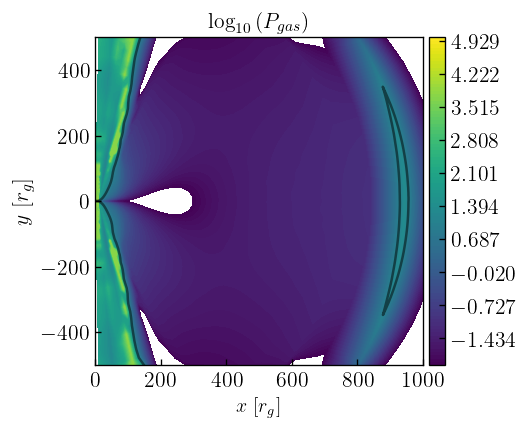

In [148]:
rd('dump200')

x = r * np.sin(h)
y = r * np.cos(h)

x = x[:,:,0]
y = y[:,:,0]
data = bsq[:,:,0]/pg[:,:,0]

from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4.5,4.5), dpi=120)

# my_levels sets the range of colors that are depicted in plt.contourf()
my_levels = np.linspace(-2., 5., 100)
im = ax.contourf(x, y, np.log10(data), levels=my_levels)

contours = ax.contour(x, y, np.log10(data), levels=[1.], colors="black", alpha=0.5)

ax.set_xlabel("$x$ [$r_g$]", fontsize=12)
ax.set_ylabel("$y$ [$r_g$]", fontsize=13)

ax.set_title(r"$\log_{10} \, (P_{gas})$", fontsize=13)

ax.tick_params("both", labelsize=13)

# xlim sets the range of the horizontal axis. The minimum value should be 0 in our case. 
ax.set_xlim(0, 1000)
# ylim sets the range of the vertical axis
ax.set_ylim(-500, 500)

# colorbar() makes the colorbar show up. 
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cb = fig.colorbar(im, cax=cax)
cb.ax.tick_params("both", labelsize=13)

# The following two lines force the aspect ratio of the plot to be unity, so the image isn't distorted. 
ax.set_aspect('equal', 'box')

fig.tight_layout()

In [149]:
v = contours.collections[0].get_paths()[0].vertices

x_edge = v[:,0]
y_edge = v[:,1]

good = y_edge < 500

x_edge = x_edge[good]
y_edge = y_edge[good]

In [183]:
from scipy.optimize import curve_fit

def func(x, a, b):
    y = (a*x)**b
    return y

results = curve_fit(func, x_edge, y_edge, p0=[1.,1.])

print("Best fit model: y = ({0:4.2f}x)**{1:4.2f}".format(*results[0]))

model = func(x_edge, *results[0])

Best fit model: y = (0.17x)**2.02


<ipython-input-183-23c26d6a5c9f>:4: RuntimeWarning: invalid value encountered in power
  y = (a*x)**b


<ipython-input-184-f8b2243d774f>:3: RuntimeWarning: divide by zero encountered in log10
  im = ax.contourf(x, y, np.log10(data), levels=my_levels)


(0.0, 500.0)

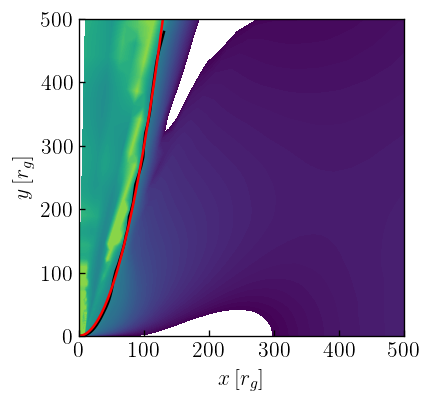

In [184]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3.5,3.5), dpi=120)

im = ax.contourf(x, y, np.log10(data), levels=my_levels)
ax.plot(x_edge, y_edge, "-", color="black")
ax.plot(x_edge, model, "-", color="red")

ax.set_xlabel("$x \, [r_g]$", fontsize=13)
ax.set_ylabel("$y \, [r_g]$", fontsize=13)
ax.tick_params("both", labelsize=13)

ax.set_xlim(0, 500)
ax.set_ylim(0, 500)

### If you finished early or are still curious:
The simulation code that produced the data that you looked at in this project is totally open source, and you can run simulations like you saw here on your personal computer. This simulation code is called 'harmpi' and the git repository for it is available here: https://github.com/atchekho/harmpi, for which there is a tutorial available here: https://github.com/atchekho/harmpi/blob/master/tutorial.md. If you are interested in running it, you can give the tutorial a try, or ask me and I would be more than happy to help you get started. 